<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment 3</h1></center>

<b>Siqi Wang</b>  

<b>Banner ID: B00976996</b>  

### 1. Task 1<a id='top'></a>

Prepare the dataset by applying data transformation. Which method of transformation did you choose? Explain your rationality behind it.

First, I checked the number of missing values in each column. I found that there is no missing values in the dataset. Then I checked the frequency of each value in each column. I found that the values in each columns are almost evenly distributed. Then I normalized the data by dividing each value by 255. This is because the values in each column are between 0 and 255. 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
print(train_data.isnull().any().sum())
print(test_data.isnull().any().sum())

0
0


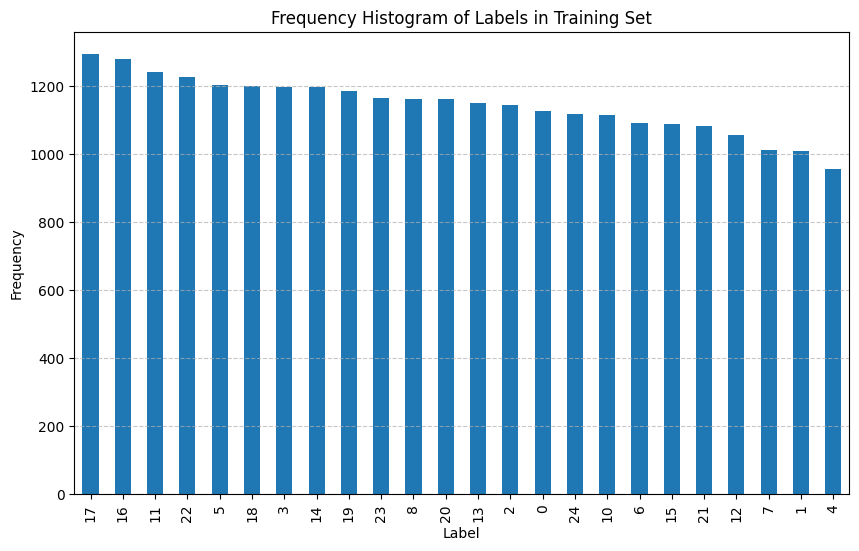

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
train_data['label'].value_counts().plot(kind='bar')
plt.title('Frequency Histogram of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

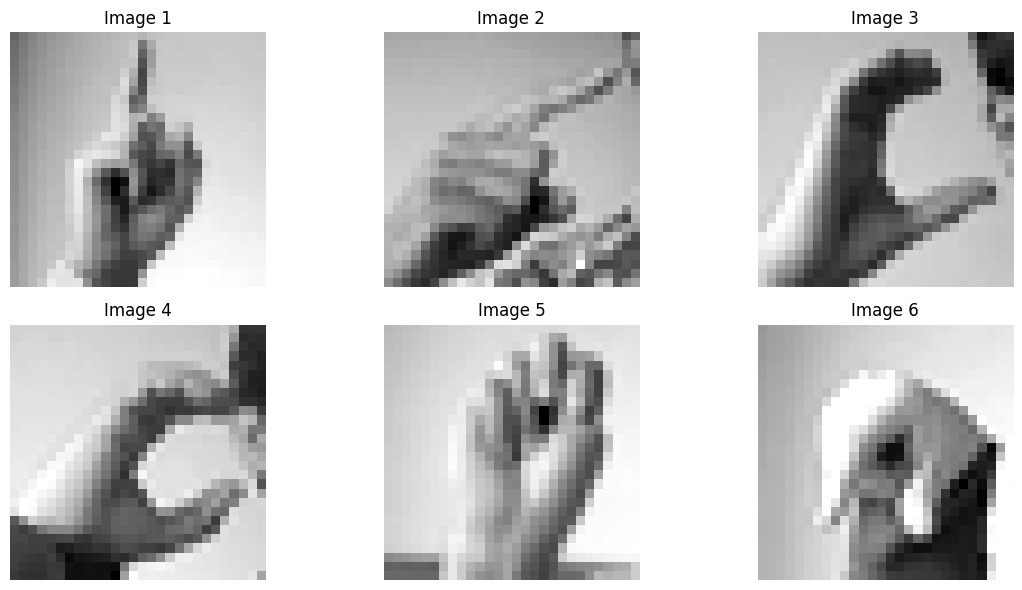

In [5]:
# Reshape the data and extract the first 6 images
images = train_data.drop('label', axis=1).values
images = images.reshape(-1, 28, 28)  # Reshape to 28x28 images
first_six_images = images[:6]

# Plotting the first 6 images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(first_six_images[i], cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
#normalizing the data
images = images / 255.0
test_images = test_data.drop('label', axis=1).values
test_images = test_images.reshape(-1, 28, 28)
test_images = test_images / 255.0
all_images = np.concatenate((images, test_images))
all_labels = np.concatenate((train_data['label'].values, test_data['label'].values))

### 2. Task 2<a id='top'></a>

Apply the k-means algorithm to Sign Language MNIST dataset.

#### i) Subtask 2.i
Change the number of clusters from 10 to 200 with the step size of 10. Show the performance of the algorithm based on accuracy and the objective function value for each cluster number.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

results = []
for n_clusters in range(10, 201, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(all_images.reshape(-1, 784))
    inertia = kmeans.inertia_
    accuracy=accuracy_score(all_labels, cluster_labels)
    print(accuracy)
    
    results.append((n_clusters, inertia, accuracy))

results_df = pd.DataFrame(results, columns=['Number of Clusters', 'Inertia', 'Accuracy'])

print(results_df)


0.06613336413781154
0.022410257891240938
0.04799722759696191
0.025673607300661334
0.01426632396684668
0.011811592110203021
0.007162041181736795
0.011407283333814654
0.011955988101770294
0.007219799578363705
0.007335316371617524
0.009270222658618996
0.009847806624888093
0.008374967510901898
0.003061195021226211
0.006526698818840789
0.01270684725792012
0.006786611603661882
0.004707309325093135
0.0056025644728102345
    Number of Clusters        Inertia  Accuracy
0                   10  551307.819562  0.066133
1                   20  491831.946856  0.022410
2                   30  460026.059370  0.047997
3                   40  438337.571254  0.025674
4                   50  421018.225275  0.014266
5                   60  407605.774676  0.011812
6                   70  393459.306491  0.007162
7                   80  383581.875367  0.011407
8                   90  374059.466071  0.011956
9                  100  364771.606015  0.007220
10                 110  357928.798529  0.007335
11     

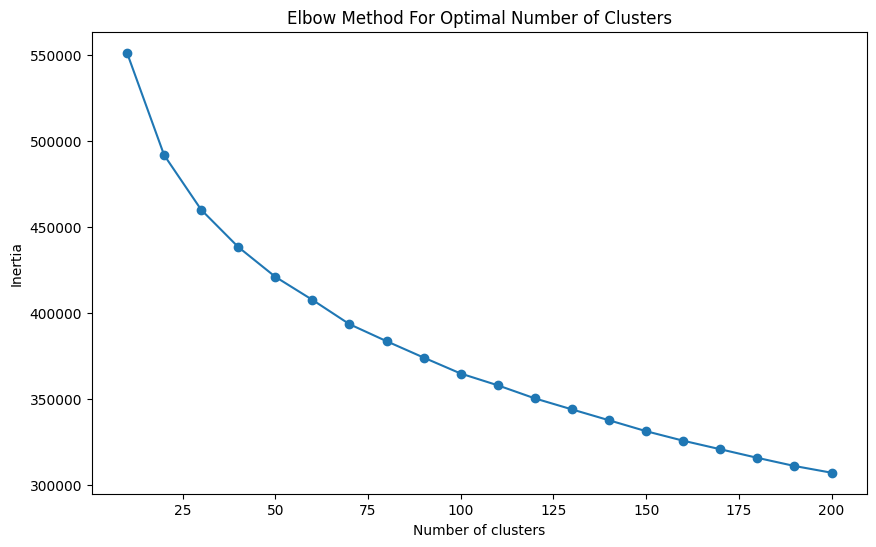

[-59475.87270601 -31805.88748664 -21688.48811549 -17319.34597877
 -13412.45059956 -14146.46818488  -9877.43112415  -9522.40929556
  -9287.86005633  -6842.80748557  -7607.62601986  -6395.7348794
  -6320.76787707  -6356.65647945  -5530.02192182  -4957.91953973
  -4998.49820184  -4736.18517974  -3915.11426137]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

inertia_values = results_df['Inertia']
cluster_range = results_df['Number of Clusters'] 

inertia_differences = np.diff(inertia_values)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')

plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(inertia_differences)


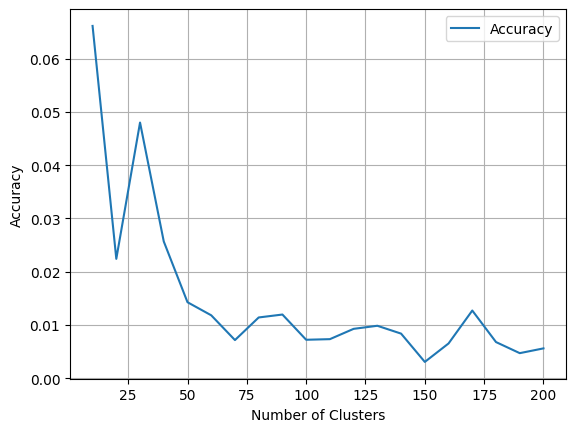

In [9]:
results_df.plot(x='Number of Clusters', y='Accuracy', kind='line')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


#### ii) Subtask 2.ii
What is the optimal number of clusters? Justify your answer.

According to the elbow method, the Inertia begins to decrease more slowly at 30 clusters, and at the same time, 30 clusters also have relatively high accuracy. Therefore, the most optimal parameter should be 30.

### 3. Task 3<a id='top'></a>

Apply the fuzzy k-means algorithm to Sign Language MNIST dataset.

#### i) Subtask 3.i
Change the number of clusters from 10 to 200 with the step size of 10. Show the performance of the algorithm based on accuracy and the objective function value for each cluster number.

In [10]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd


results = []
for n_clusters in range(10, 201, 10):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        all_images.reshape(-1, 784).T, 
        n_clusters,
        2,
        error=0.005, 
        maxiter=1000,  
        init=None  
    )
    

    labels = np.argmax(u, axis=0)
    
    # Store the results
    accuracy=accuracy_score(all_labels, labels)
    results.append((n_clusters, fpc,accuracy))

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Number of Clusters', 'FPC','Accuracy'])

# Display the results
print(results_df)


    Number of Clusters       FPC  Accuracy
0                   10  0.100001  0.036850
1                   20  0.050000  0.057989
2                   30  0.033334  0.016779
3                   40  0.025000  0.001040
4                   50  0.020000  0.017530
5                   60  0.016667  0.022150
6                   70  0.014286  0.015710
7                   80  0.012500  0.000144
8                   90  0.011111  0.004909
9                  100  0.010000  0.000029
10                 110  0.009091  0.036272
11                 120  0.008333  0.001271
12                 130  0.007692  0.000029
13                 140  0.007143  0.011552
14                 150  0.006667  0.021573
15                 160  0.006250  0.005054
16                 170  0.005882  0.000029
17                 180  0.005556  0.020418
18                 190  0.005263  0.000000
19                 200  0.005000  0.000058


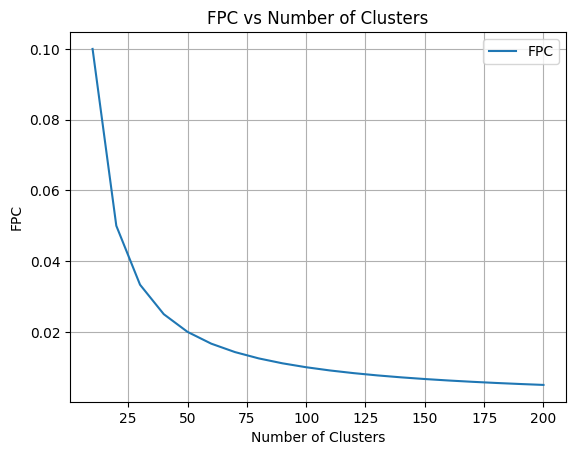

In [11]:
results_df.plot(x='Number of Clusters', y='FPC', kind='line')
plt.title('FPC vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('FPC')
plt.grid(True)
plt.show()

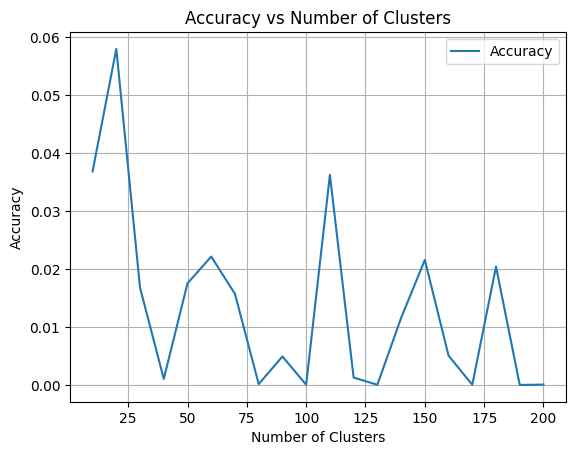

In [12]:
results_df.plot(x='Number of Clusters', y='Accuracy', kind='line')
plt.title('Accuracy vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


#### ii) Subtask 3.ii
Show the performance of the algorithm based on accuracy and the objective function value by changing the fuzzifier value from 1 to 5 with the step size of 1.

In [13]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd

# Assuming 'all_images' is a variable containing the image data reshaped as needed

results = []
for fuz in range(2, 6, 1):

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        
        all_images.reshape(-1, 784).T,
        20,  
        fuz,  
        error=0.005,  
        maxiter=1000,  
        init=None 
    )
    
 
    labels = np.argmax(u, axis=0)
    
    # Store the results
    accuracy=accuracy_score(all_labels, labels)

    results.append((fuz, fpc,accuracy))

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['fuz', 'FPC','Accuracy'])

# Display the results
print(results_df)


   fuz   FPC  Accuracy
0    2  0.05  0.046120
1    3  0.05  0.040460
2    4  0.05  0.043839
3    5  0.05  0.034395


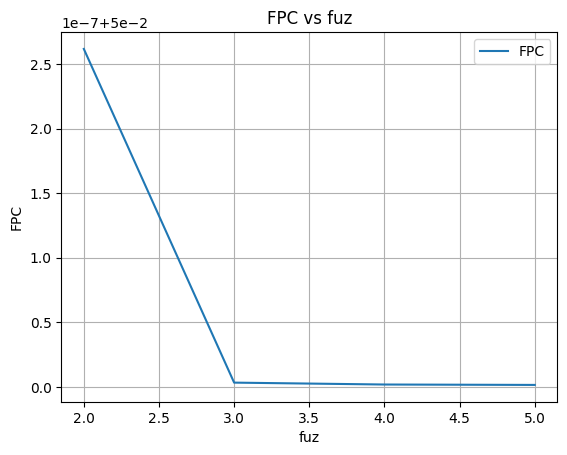

In [14]:
results_df.plot(x='fuz', y='FPC', kind='line')
plt.title('FPC vs fuz')
plt.xlabel('fuz')
plt.ylabel('FPC')
plt.grid(True)
plt.show()

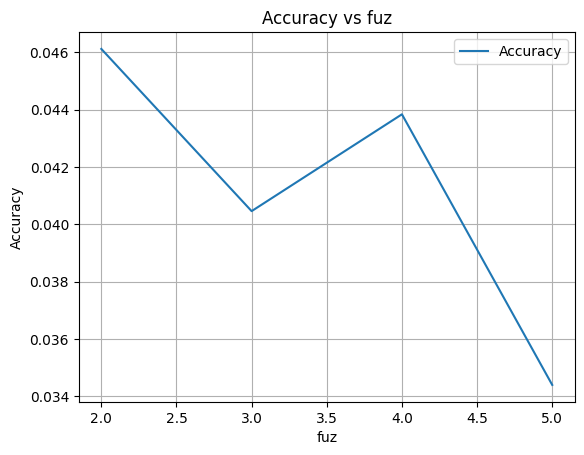

In [15]:
results_df.plot(x='fuz', y='Accuracy', kind='line')
plt.title('Accuracy vs fuz')
plt.xlabel('fuz')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


#### iii) Subtask 3.iii
Compare k-means and FCM based on the results that you achieved.

Overall, neither standard K-means nor Fuzzy K-means are particularly suitable for the current dataset. The dataset is more suited for supervised learning. However, between the two, standard K-means is somewhat more appropriate for this dataset as the divisions within it are more distinct. There are no significantly ambiguous membership scenarios. Therefore, the final objective function and accuracy are indeed somewhat better.

### 4. Task 4<a id='top'></a>

Implement a feedforward neural network and train the network. This network will be trained and tested using the train and test sets of the dataset. Specifically, given an input image (28 x 28 = 784 pixels) from the Sign-MNIST dataset, the network will be trained to classify the image into 1 of 24 classes.

#### i) Subtask 4.i
Develop a simple Convolutional Neural Network with maximum 10 hidden layers composed of convolutional, pooling and fully connected layers. Design and build your model. Specify kernel sizes, number of filters, activation functions, learning rate, optimization, and loss functions of your model.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
num_classes = 25
train_labels_categorical = to_categorical(train_data['label'], num_classes)
test_labels_categorical = to_categorical(test_data['label'], num_classes)

# Reshape the images to include the channel dimension
train_images_reshaped = images.reshape(-1, 28, 28, 1)
test_images_reshaped = test_images.reshape(-1, 28, 28, 1)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


2023-11-23 14:09:33.354432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [17]:
history = model.fit(
    train_images_reshaped, 
    train_labels_categorical, 
    epochs=10, 
    validation_data=(test_images_reshaped, test_labels_categorical)
)


Epoch 1/10
858/858 [==============================] - 22s 25ms/step - loss: 1.7026 - accuracy: 0.4581 - val_loss: 0.6954 - val_accuracy: 0.7658
Epoch 2/10
858/858 [==============================] - 22s 26ms/step - loss: 0.7188 - accuracy: 0.7376 - val_loss: 0.4223 - val_accuracy: 0.8482
Epoch 3/10
858/858 [==============================] - 23s 27ms/step - loss: 0.4914 - accuracy: 0.8144 - val_loss: 0.3442 - val_accuracy: 0.8931
Epoch 4/10
858/858 [==============================] - 25s 29ms/step - loss: 0.3860 - accuracy: 0.8529 - val_loss: 0.3099 - val_accuracy: 0.9077
Epoch 5/10
858/858 [==============================] - 27s 31ms/step - loss: 0.3289 - accuracy: 0.8719 - val_loss: 0.3196 - val_accuracy: 0.9000
Epoch 6/10
858/858 [==============================] - 26s 30ms/step - loss: 0.2900 - accuracy: 0.8870 - val_loss: 0.3274 - val_accuracy: 0.9119
Epoch 7/10
858/858 [==============================] - 27s 32ms/step - loss: 0.2488 - accuracy: 0.9030 - val_loss: 0.3214 - val_accuracy:

In [18]:
test_loss, test_accuracy = model.evaluate(test_images_reshaped, test_labels_categorical)
print(f"Test accuracy: {test_accuracy}")

225/225 [==============================] - 2s 7ms/step - loss: 0.3648 - accuracy: 0.9237
Test accuracy: 0.9237311482429504


In [19]:
model.save('sign_language_mnist_model.h5')

#### ii) Subtask 4.ii
Plot the confusion matrix and evaluate the performance of your classification model.

In [20]:
predictions = model.predict(test_images_reshaped)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_categorical, axis=1)

225/225 [==============================] - 1s 6ms/step


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

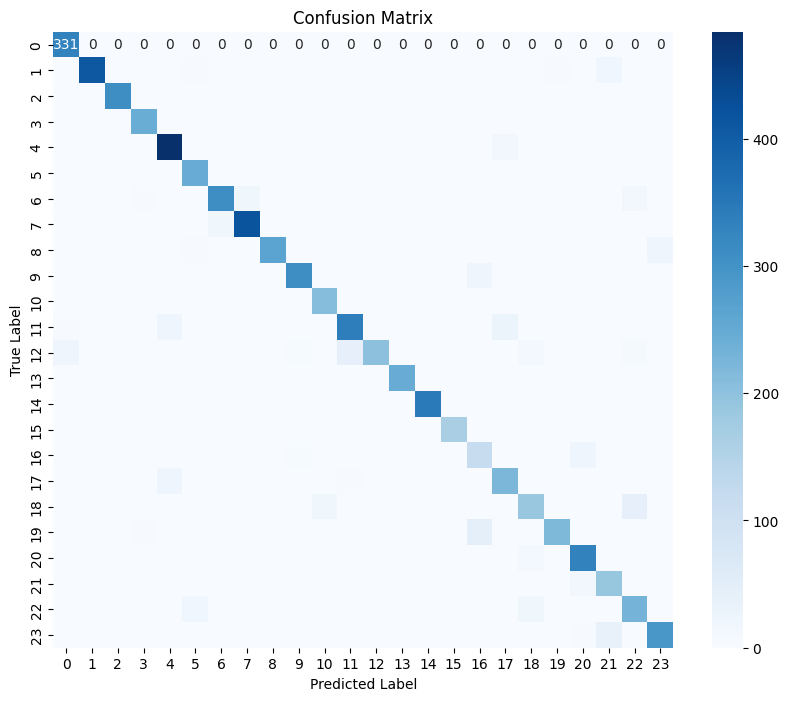

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9237311767986615
Precision: 0.9286037181693197
Recall: 0.9237311767986615
F1 Score: 0.9238017969061731


### References:
Keras. (n.d.). API layers. Retrieved [2023.11.21], from https://keras.io/api/layers/

SciKit-Fuzzy. (n.d.). C-means. Retrieved [2023.11.21], from https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#cmeans
